### representing time on axes

2015-07-01 00:00:00

Sales                     18
Time     2015-07-01 00:00:00
dtype: object
Jul 01

2015-07-02 00:00:00

Sales                     48
Time     2015-07-02 00:00:00
dtype: object
Jul 02

2015-07-03 00:00:00

Sales                     40
Time     2015-07-03 00:00:00
dtype: object
Jul 03

2015-07-04 00:00:00

Sales                     47
Time     2015-07-04 00:00:00
dtype: object
Jul 04

2015-07-05 00:00:00

Sales                     38
Time     2015-07-05 00:00:00
dtype: object
Jul 05

2015-07-06 00:00:00

Sales                     16
Time     2015-07-06 00:00:00
dtype: object
Jul 06

2015-07-07 00:00:00

Sales                     14
Time     2015-07-07 00:00:00
dtype: object
Jul 07

2015-07-08 00:00:00

Sales                     13
Time     2015-07-08 00:00:00
dtype: object
Jul 08

2015-07-09 00:00:00

Sales                     19
Time     2015-07-09 00:00:00
dtype: object
Jul 09

2015-07-10 00:00:00

Sales                     32
Time     2015-07-10 00:00:00
dtype: objec

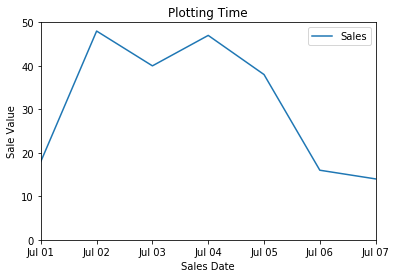

In [6]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.DataFrame(columns=('Time', 'Sales'))

start_date = dt.datetime(2015, 7,1)
end_date = dt.datetime(2015, 7,10)
daterange = pd.date_range(start_date, end_date)

for single_date in daterange:
    print(single_date)
    print()
    row = dict(zip(['Time', 'Sales'],[single_date, int(50*np.random.rand(1))]))
    row_s = pd.Series(row)
    print(row_s)
    row_s.name = single_date.strftime('%b %d') 
    print(row_s.name)
    print()
    df = df.append(row_s)
    
print(df)
df.loc['Jul 01':'Jul 07', ['Time', 'Sales']].plot() 

plt.ylim(0, 50)
plt.xlabel('Sales Date')
plt.ylabel('Sale Value')
plt.title('Plotting Time') 
plt.show()

In [7]:
df

Time Sales
Jul 01 2015-07-01    18
Jul 02 2015-07-02    48
Jul 03 2015-07-03    40
Jul 04 2015-07-04    47
Jul 05 2015-07-05    38
Jul 06 2015-07-06    16
Jul 07 2015-07-07    14
Jul 08 2015-07-08    13
Jul 09 2015-07-09    19
Jul 10 2015-07-10    32

In [4]:
start_date

datetime.datetime(2015, 7, 1, 0, 0)

### plotting trends over time

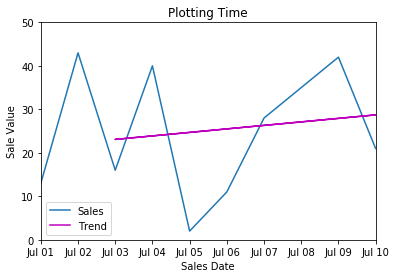

In [18]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pylab as plb

df = pd.DataFrame(columns=('Time', 'Sales'))
start_date = dt.datetime(2015, 7,1)
end_date = dt.datetime(2015, 7,10)
daterange = pd.date_range(start_date, end_date)

for single_date in daterange:
    row = dict(zip(['Time', 'Sales'],[single_date, int(50*np.random.rand(1))]))
    row_s = pd.Series(row)
    row_s.name = single_date.strftime('%b %d') 
    df = df.append(row_s)
    
df.loc['Jul 01':'Jul 10', ['Time', 'Sales']].plot()

z = np.polyfit(range(0, 10), df.as_matrix(['Sales']).flatten(), 1)

p = np.poly1d(z) 
plb.plot(df.as_matrix(['Sales']),p(df.as_matrix(['Sales'])), 'm-')

plt.ylim(0, 50) 
plt.xlabel('Sales Date') 
plt.ylabel('Sale Value') 
plt.title('Plotting Time') 
plt.legend(['Sales', 'Trend']) 
plt.show()

## Python Data Science Handbook (OReilly)
### Working with Time Series
#### Native Python dates and times: datetime and dateutil

In [19]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [20]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [21]:
date.strftime('%A')

'Saturday'

#### Typed arrays of times: NumPy's Datetime64

In [23]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [26]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [27]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [28]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [29]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Dates and times in pandas: best of both worlds

In [30]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [31]:
date.strftime('%A')

'Saturday'

In [32]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [35]:
pd.to_timedelta(np.arange(12), 'W')

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days',
                '70 days', '77 days'],
               dtype='timedelta64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [36]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [37]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [38]:
data["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

In [39]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [41]:
#from Index to Period (include frequency code)
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [42]:
#create a TimedeltaIndex
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: pd.date_range()

In [43]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [44]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [46]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [47]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# Frequencies and Offset


Code	Description	
D   Calendar day	
W	Weekly		
M	Month end	
Q	Quarter end	
A	Year end	
H	Hours	
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds	
B	Business day

BM	Business month end

BQ	Business quarter end

BA	Business year end

BH	Business hours


    MS	Month start		BMS	Business month start
    QS	Quarter start		BQS	Business quarter start
    AS	Year start		BAS	Business year start

In [48]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [49]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing

In [66]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


Open   High    Low  Close  Volume
Date                                          
2004-08-19  49.96  51.98  47.93  50.12     NaN
2004-08-20  50.69  54.49  50.20  54.10     NaN
2004-08-23  55.32  56.68  54.47  54.65     NaN
2004-08-24  55.56  55.74  51.73  52.38     NaN
2004-08-25  52.43  53.95  51.89  52.95     NaN

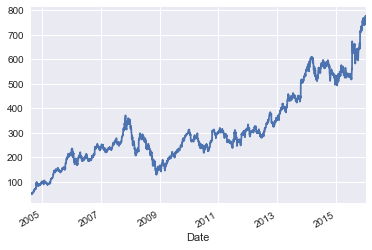

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog = goog["Close"]
goog.plot()

## Resampling and converting frequencies
resampling at a higher or lower frequency -> 
__resample()__ (data aggregation) / __asfreq()__ (data selection)

 - resample reports the average of the previous year
 - asfreq reports the value at the end of the year
 
 - for up-sampling, resample and asfreq are largely equivalent

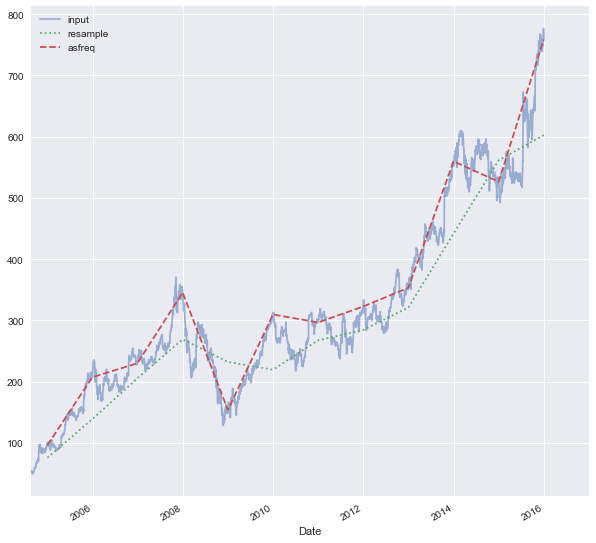

In [60]:
goog.plot(alpha=0.5, style='-', figsize = (10,10))
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

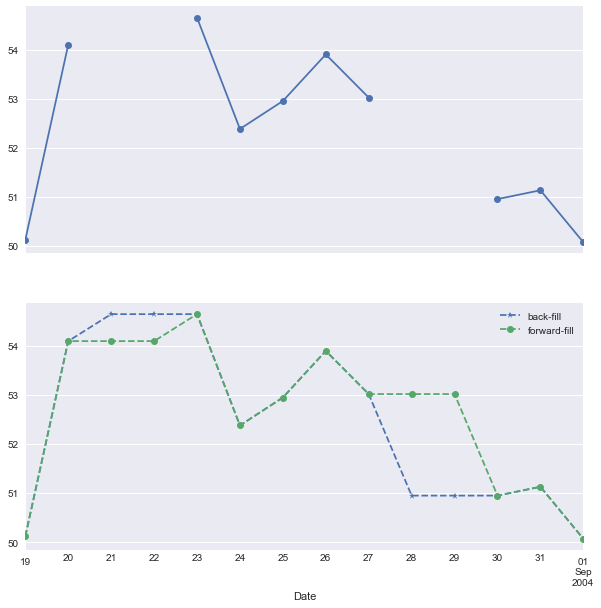

In [63]:
fig, ax = plt.subplots(2, sharex=True, figsize= (10,10))
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='--*')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

In [64]:
data

Date
2004-08-19    50.12
2004-08-20    54.10
2004-08-23    54.65
2004-08-24    52.38
2004-08-25    52.95
2004-08-26    53.90
2004-08-27    53.02
2004-08-30    50.95
2004-08-31    51.13
2004-09-01    50.07
Name: Close, dtype: float64

In [65]:
data.asfreq('D')

Date
2004-08-19    50.12
2004-08-20    54.10
2004-08-21      NaN
2004-08-22      NaN
2004-08-23    54.65
2004-08-24    52.38
2004-08-25    52.95
2004-08-26    53.90
2004-08-27    53.02
2004-08-28      NaN
2004-08-29      NaN
2004-08-30    50.95
2004-08-31    51.13
2004-09-01    50.07
Freq: D, Name: Close, dtype: float64

## Time shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both shift() and tshift() by 900 days;

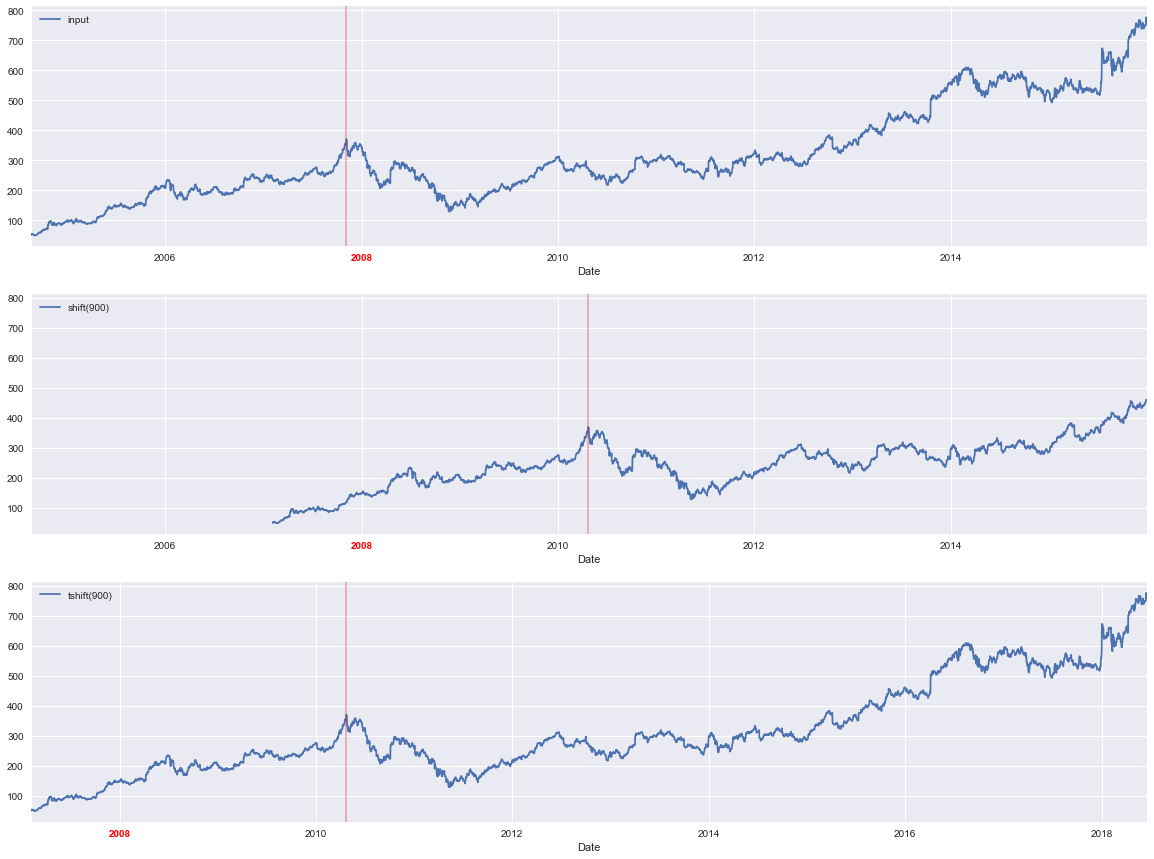

In [72]:

fig, ax = plt.subplots(3, sharey=True, figsize=(20,15))

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

A common context for this type of shift is in __computing differences over time__. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

(helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been shortly after its IPO and in the middle of the 2009 regression)

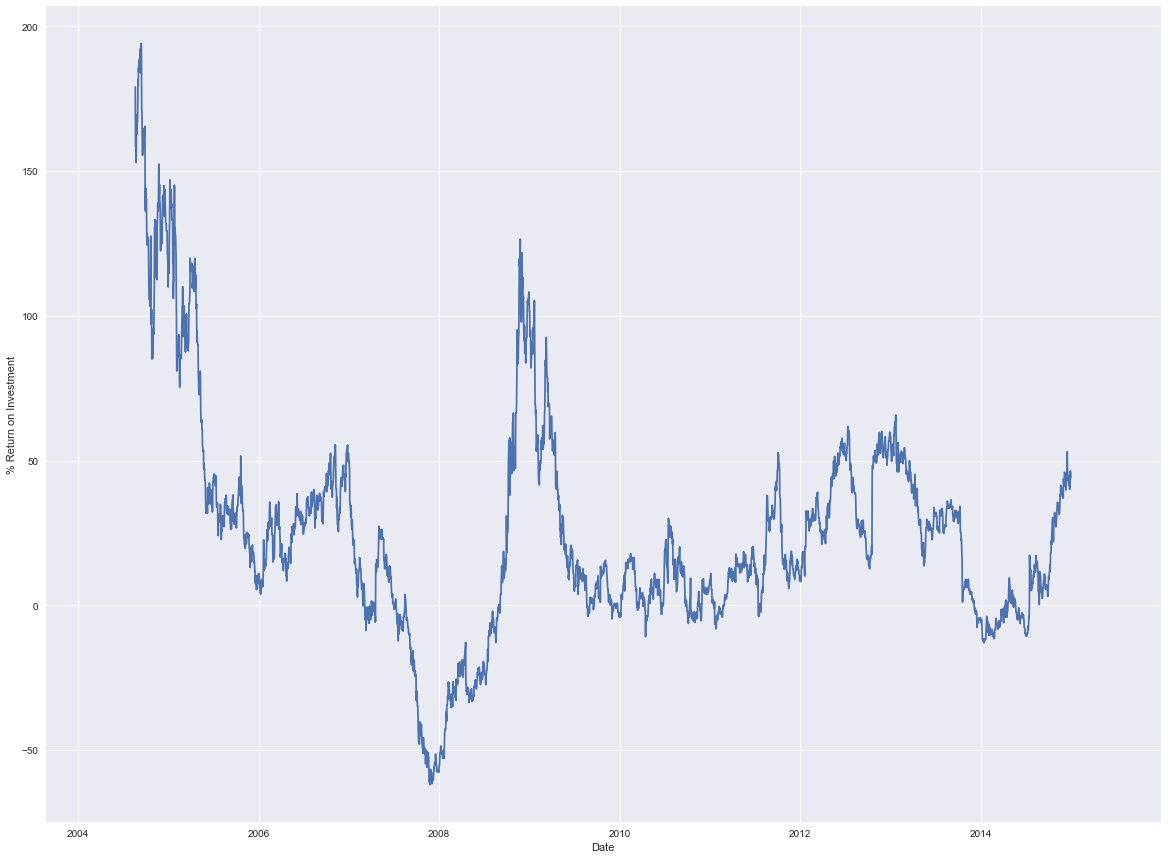

In [75]:
fig = plt.subplots(1, figsize = (20,15))
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

In [76]:
goog.tshift(-365)

Date
2003-08-20     50.12
2003-08-21     54.10
2003-08-22     54.10
2003-08-23     54.10
2003-08-24     54.65
2003-08-25     52.38
2003-08-26     52.95
2003-08-27     53.90
2003-08-28     53.02
2003-08-29     53.02
2003-08-30     53.02
2003-08-31     50.95
2003-09-01     51.13
2003-09-02     50.07
2003-09-03     50.70
2003-09-04     49.95
2003-09-05     49.95
2003-09-06     49.95
2003-09-07     49.95
2003-09-08     50.74
2003-09-09     51.10
2003-09-10     51.10
2003-09-11     52.61
2003-09-12     52.61
2003-09-13     52.61
2003-09-14     53.70
2003-09-15     55.69
2003-09-16     55.94
2003-09-17     56.93
2003-09-18     58.69
               ...  
2014-12-02    762.38
2014-12-03    752.54
2014-12-04    766.81
2014-12-05    766.81
2014-12-06    766.81
2014-12-07    763.25
2014-12-08    762.37
2014-12-09    751.61
2014-12-10    749.46
2014-12-11    738.87
2014-12-12    738.87
2014-12-13    738.87
2014-12-14    747.77
2014-12-15    743.40
2014-12-16    758.09
2014-12-17    749.43
2014-12-

# Example: Visualizing Seattle Bicycle Counts

In [81]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1290k    0 1290k    0     0   322k      0 --:--:--  0:00:04 --:--:--  265k


In [88]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

Fremont Bridge West Sidewalk  \
Date                                                
2012-10-03 00:00:00                           4.0   
2012-10-03 01:00:00                           4.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           2.0   
2012-10-03 04:00:00                           6.0   

                     Fremont Bridge East Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0

## eval()

In [89]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.head()

West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0

In [90]:
data.isnull().any()

West     True
East     True
Total    True
dtype: bool

In [94]:
data[data.West.isnull()]

West  East  Total
Date                                  
2013-06-14 09:00:00   NaN   NaN    NaN
2013-06-14 10:00:00   NaN   NaN    NaN
2014-03-09 02:00:00   NaN   NaN    NaN
2015-03-08 02:00:00   NaN   NaN    NaN
2015-04-21 11:00:00   NaN   NaN    NaN
2015-04-21 12:00:00   NaN   NaN    NaN
2016-03-13 02:00:00   NaN   NaN    NaN
2017-03-12 02:00:00   NaN   NaN    NaN

In [95]:
data.dropna().describe()

West          East         Total
count  45976.000000  45976.000000  45976.000000
mean      54.712306     55.479315    110.191622
std       72.935797     80.232055    139.189603
min        0.000000      0.000000      0.000000
25%        7.000000      7.000000     15.000000
50%       29.000000     28.000000     60.000000
75%       72.000000     68.000000    144.000000
max      854.000000    717.000000   1165.000000

## Visualizing the data

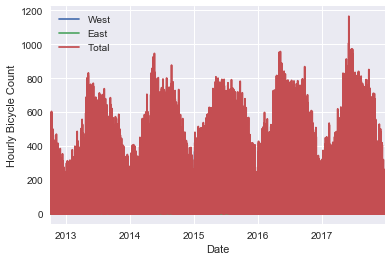

In [97]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

### insight by resampling the data to a coarser grid -> by week

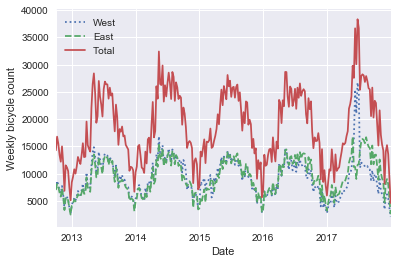

In [98]:

weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

### rolling mean -> 30 day rolling mean with centered window

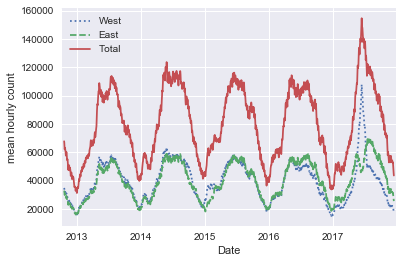

In [100]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

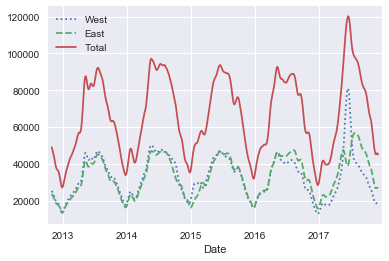

In [104]:
## smoother version of a rolling mean using a window function -> gaussian window (width window: 50, width Gaussian: 10)
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

## Digging into the data

(smoothing just useful to get an idea of the general trend)
looking at average traffic as a function of the time of day

In [109]:
by_time = data.groupby(data.index.time).mean()
by_time.describe()

West        East       Total
count   24.000000   24.000000   24.000000
mean    54.708697   55.474106  110.182803
std     52.447255   60.441698  104.041857
min      1.612735    1.382046    2.994781
25%     13.307803   11.526357   24.798147
50%     49.625406   41.866841   90.542573
75%     68.279228   71.798948  145.634668
max    206.107516  256.066284  375.824113

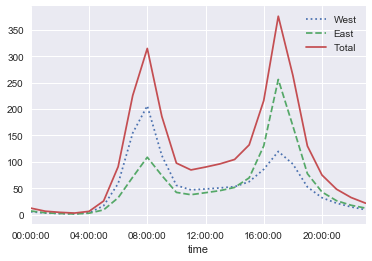

In [110]:
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks = hourly_ticks,style=[':', '--', '-'])

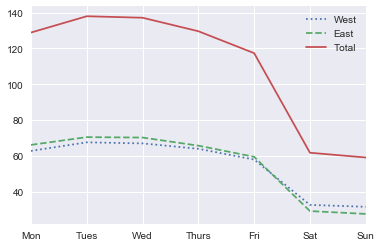

In [111]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

### hourly trend on weekdays versus weekends

In [126]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
print(data.head())
by_time = data.groupby([weekend, data.index.time]).mean()
data.groupby([weekend, data.index.time]).describe()

                     West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0


West                                                      \
                   count        mean         std  min     25%    50%     75%   
Weekday 00:00:00  1368.0    4.739766    3.633881  0.0    2.00    4.0    6.00   
        01:00:00  1368.0    2.449561    2.399177  0.0    1.00    2.0    3.00   
        02:00:00  1368.0    1.827485    2.369535  0.0    1.00    1.0    3.00   
        03:00:00  1368.0    1.458333    1.344099  0.0    0.00    1.0    2.00   
        04:00:00  1368.0    4.187865    2.406818  0.0    2.00    4.0    6.00   
        05:00:00  1368.0   21.797515    9.480003  0.0   15.00   21.0   27.00   
        06:00:00  1368.0   79.149123   37.078631  0.0   55.00   73.0  101.00   
        07:00:00  1368.0  209.562135   97.640543  0.0  143.00  201.0  273.00   
        08:00:00  1368.0  275.688596  113.160383  0.0  205.75  278.0  352.25   
        09:00:00  1367.0  138.850768   54.071191  0.0  104.50  140.0  175.00   
        10:00:00  1367.0   55.752743   24.393288  0.0   39.00   56.0   71.50   
        11:00:00  1367.0   40.472568   20.334874  0.0   26.00   39.0   52.00   
        12:00:00  1367.0   40.485004   20.698304  0.0   26.00   40.0   53.00   
        13:00:00  1368.0   42.630117   22.215623  0.0   26.00   42.0   56.00   
        14:00:00  1368.0   45.288012   23.106106  0.0   29.00   44.0   59.00   
        15:00:00  1368.0   59.168860   27.495534  1.0   40.00   57.0   75.00   
        16:00:00  1368.0   94.337719   48.558037  1.0   62.00   91.0  119.00   
        17:00:00  1368.0  145.991228   87.691802  0.0   96.00  136.0  184.00   
        18:00:00  1368.0  117.165936   66.314006  0.0   72.00  107.0  157.00   
        19:00:00  1368.0   62.098684   40.384198  1.0   33.00   51.5   87.00   
        20:00:00  1368.0   36.904971   26.319344  1.0   18.00   28.0   52.00   
        21:00:00  1368.0   24.820175   17.141047  1.0   13.00   20.0   33.00   
        22:00:00  1368.0   16.290205   11.234346  0.0    9.00   14.0   21.00   
        23:00:00  1368.0    9.899123    7.627870  0.0    5.00    9.0   13.00   
Weekend 00:00:00   548.0    7.273723    4.868460  0.0    4.00    6.0   10.00   
        01:00:00   548.0    4.403285    3.305271  0.0    2.00    4.0    6.00   
        02:00:00   544.0    3.152574    2.483958  0.0    1.00    3.0    4.00   
        03:00:00   548.0    1.998175    6.063497  0.0    0.00    1.0    3.00   
        04:00:00   548.0    1.782847    1.899273  0.0    1.00    1.0    2.00   
        05:00:00   548.0    4.397810    4.124940  0.0    2.00    4.0    6.00   
        06:00:00   548.0    8.509124    7.077393  0.0    4.00    7.0   11.00   
        07:00:00   548.0   17.383212   12.408755  1.0    8.00   14.0   24.00   
        08:00:00   548.0   32.408759   18.841513  2.0   19.00   29.0   43.00   
        09:00:00   548.0   44.855839   25.657340  4.0   25.00   41.5   61.00   
        10:00:00   548.0   54.815693   30.480083  7.0   30.75   52.0   74.00   
        11:00:00   548.0   62.956204   34.852600  6.0   35.00   60.0   87.00   
        12:00:00   548.0   68.689781   37.963402  5.0   39.00   65.0   94.00   
        13:00:00   548.0   70.826642   40.473580  6.0   38.00   69.5   97.00   
        14:00:00   548.0   72.038321   40.466073  5.0   39.00   70.0  102.00   
        15:00:00   548.0   70.582117   41.134312  5.0   34.00   70.0  100.00   
        16:00:00   548.0   64.547445   39.725239  5.0   29.00   62.0   93.00   
        17:00:00   548.0   54.270073   36.887398  1.0   23.00   49.5   82.00   
        18:00:00   548.0   42.824818   30.556484  1.0   16.00   37.0   67.00   
        19:00:00   548.0   28.423358   22.344068  1.0   10.00   22.0   44.00   
        20:00:00   548.0   20.096715   17.203900  0.0    7.00   14.0   29.00   
        21:00:00   548.0   14.195255   12.517053  0.0    6.00   10.0   19.00   
        22:00:00   548.0   10.510949    8.532863  0.0    5.00    8.0   14.00   
        23:00:00   548.0    7.872263    7.044785  0.0    4.00    6.0   10.00   

                   

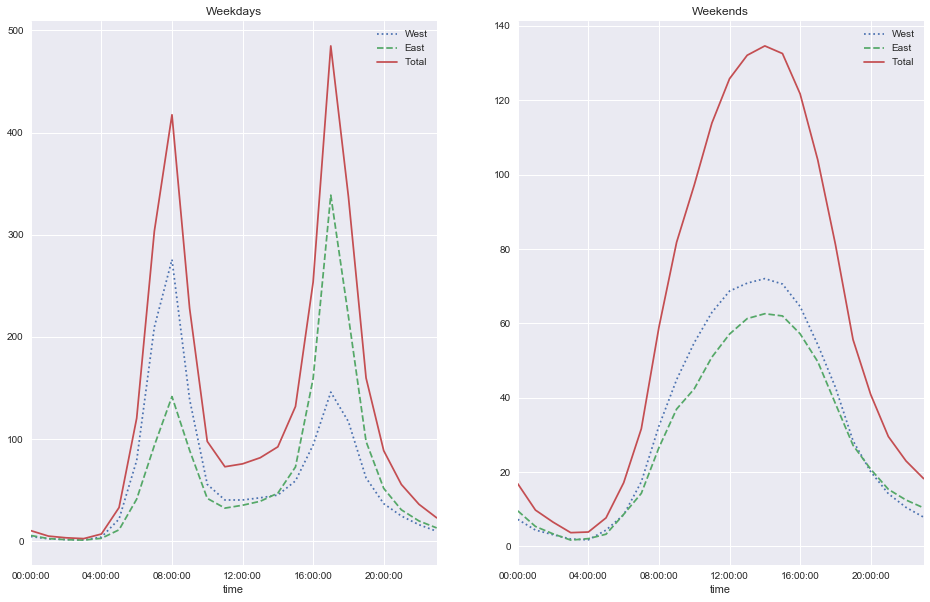

In [116]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

## Linear Regression

In [133]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1290k    0 1290k    0     0  17383      0 --:--:--  0:01:16 --:--:-- 51601273      0 --:--:--  0:01:08 --:--:-- 72630


In [ ]:
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

count.head()

In [ ]:
weather.head()

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns